In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def sigmoid(z_):
    return 1/(1 + np.exp(-z_))

# Audio Machine Learning - Formative Task - Exercise 2
## 1 - Binary Classification with Logistic Regression Preamble

### 1.1 - Dataset

The dataset $D = \{(x^{(i)}, y^{(i)})\}^N_{i=1}$, contains $N$ labelled datapoints. Each datapoint consists of a feature vector, $x^{(i)}$, and the correspoinding class label, $y^{(i)}$.  


$x^{(i)}$ denotes the feature vector of the $i$-th datapoint is the dataset, and $y^{(i)}$ denotes the $i$-th label.

Each feature vector $x^{(i)}$, consists of $j$ features. $x^{(i)}_j$ denotes the $j$-th element in the feature vector $x^{(i)}$.\
The first element of the feature vector, $x^{(i)}_0$, is the 'dummy variable', which is always equal to one.

Each class label, $y^{(i)}$, consists of a single class label. Each class label is either 1 or 0.

### 1.2 - Logistic Regression Model

The logistic regression model is a parameterised classification model. It has $j$ parameters, one for each feature in the feature vector $x^{(i)}$. The parameters are held in the parameter vector $\theta$, where $\theta_j$ denotes the $j$-th parameter.

Assuming that $\theta$ and $x^{(i)}$ are both $j \times 1$  matrices (also known as column vectors), the output of the logistic regression model for the $i$-th item in the dataset D is given by:

$$f(x^{(i)}, \theta) = \frac{1}{1 + e^{-\theta^Tx^{(i)}}} = \hat{y}^{(i)}$$

Where $\hat{y}^{(i)}$ the model's prediction for $i$-th datapoint in the dataset D.



### 1.3 - Binary Cross Entropy Loss

The binary cross entropy loss function measures the difference between the logistic regression model's prediction, $\hat{y}^{(i)}$, and the true class label, $y^{(i)}$.

It is given by the following formula:

$$L(y^{(i)},\hat{y}^{(i)})=-(y^{(i)}\log(\hat{y}^{(i)}) + (1 - y^{(i)})\log(1 - \hat{y}^{(i)}))$$

Where log is the natural logarithm function, given in numpy by np.log().

The derivative of the loss function with respect to the parameter $\theta_j$, for a single datapoint $i$, is given by:

$$\frac{\delta}{\delta\theta_j}L(\theta) = -(y^{(i)} - \hat{y}^{(i)})x^{(i)}_j$$

### 1.4 - Gradient Descent

Gradient descent is performed by iteratively updating each of the parameters in parameter vector $\theta$. For each iteration, the gradient of the loss with respect to each of the parameters is found, and the each parameter is updated according to the following:

$$\theta_j := \theta_j - \alpha(-(y^{(i)} - \hat{y}^{(i)})x^{(i)}_j)$$

Where $\alpha$ is a small constant called the 'Learning Rate'. This gives the gradient descent update rule for a single example $i$. To carry out batch gradient descent, for each iteration we take the sum of the gradient of the loss function with respect to $\theta_j$, over each of the $N$ examples in the dataset $D$.

$$\theta_j := \theta_j -  \frac{\alpha}{N}\sum_{i=1}^{N} (-(y^{(i)} - \hat{y}^{(i)})x^{(i)}_j)$$

This calculates the gradient of the loss function with respect to $\theta_j$, and then updates $\theta_j$ by taking a step in the direction of the negative of the gradient. Iteratively repeating this process causes the loss to decrease, until is converges on the global minimum (if the learning rate is set appropriately).


## 2 - Implementation

### 2.1 - Task 1 - Implementing the Logistic Regression model with gradient descent

Your task is to implement the logistic regression model. It should work for a dataset with any number of training examples, $N$, and any number of features $j$. You should used the Python class template provided below:

In [145]:
# define the LogisticRegression class
class LogisticRegression:
    
    def __init__(self):
        pass

   #  The LogisticRegression class should have the method 'load_dataset', which takes the features and 
   #  corresponding labels as it's argument and saves it for training.
   #  The 'load_dataset' method should do the following:
   #       1. Initialise the model's parameters, as self.thetas, where self.thetas is a numpy array of 
   #          zeros containing the appropriate number of parameters based on the 'Dataset' argument 
   #          provided to the model (ensure that self.thetas.dtype is 'float' and not 'int')
   #       2. Save the maximum and minimum values of each feature contained in the dataset as class 
   #          attributes using 'self.'
   #       3. Normalise the features in 'Dataset', using min-max normalisation so they have a minimum 
   #          value of 0 and maximum value of 1
   #          # You don't need to normalise the 'dummy variable' x_0
   #       4. Add the dummy variable to the features array. The dummy variable should have N elements, 
   #          which are all equal to 1.
   #       5. Save the features and labels to the class using self.features = features_ and self.labels = labels_
   #  If the LogisticRegression class already has a dataset saved, it should be replaced by whatever dataset is 
   #  passed to the 'load_dataset' method.


    # The argument 'features_' should be a numpy array of shape (N, j), 
    # The argument 'labels_' should be a numpy array of shape (N)
    def load_dataset(self, features_, labels_):
        """ 
        
        Args:
            features_(np.array): Feature array with shape (N x j)
            labels_(np.array): Label array with shape (N)

        Returns:

            None

        """
               
        self.features = np.array(features_)
        self.labels = np.array(labels_).reshape( np.shape(self.features)[0] , 1 )
        dimFeatures = np.ndim(self.features)

        # Get max and min for each feature
        self.max_feature = np.max(self.features, axis= 0)
        self.min_feature = np.min(self.features, axis= 0)
  
        self.norm_features = (self.features - self.min_feature) / (self.max_feature - self.min_feature)
  
        # Insert a column of ones
        self.norm_features = np.insert(self.norm_features , 0 , 1 , axis= 1)

        self.features_number = np.shape(self.norm_features)[1]

        self.thetas = np.zeros((self.features_number , 1))

        if dimFeatures != 2:
            raise ValueError( f"Expected 2D array (N, j), got a {features_.ndim}D array")
        
        if self.features.shape[0] != self.labels.shape[0]:
            raise ValueError( f"Features and labels must have the same number of rows")
        
        return self
   

    
   #  The 'train_model' method implements batch gradient descent. The argument 'iters' determines how many steps of
   #  batch gradient descent to carry out. For each training iteration, this function should do the following:
   #       1. Calculate the model's predictions with the current model parameters, using the formula given in section 1.2
   #       2. Calculate and save the binary cross entropy loss for the current model parameters
   #          # Be aware that large negative numbers might be rounded down to 0 by the sigmoid function. 
   #          # This will result in np.log(0) returning -infinity.
   #          # You can limit the range of possible input values to the sigmoid function using np.clip()
   #       3. Update each model parameter according to the batch gradient descent rule defined in section 1.4
   #  After completing all iterations, the method should return a list of the losses
    
   #  The argument 'alpha' determines the step size
   #  Note that the sigmoid function is defined at the start of this notebook


    def train_model(self, iters_, alpha_):
        
        self.alpha = alpha_
        self.iters = iters_
        self.loss_history = np.zeros([self.iters,1])

        for i in range(self.iters):

            # Need thetas to be a 1 x J and features to be a J x N
            z = self.norm_features @ self.thetas

            y_hat = 1 / ( 1 + np.exp( -z ) )

            y_hat = np.clip(y_hat, 1e-15, 1 - 1e-15)

            loss = -( self.labels *  np.log(y_hat) + (1 - self.labels) * np.log(1 - y_hat))

            self.loss_history[i] = np.mean( loss )

            grad_loss = -( self.labels - y_hat ) * self.norm_features

            self.thetas = self.thetas - self.alpha * np.mean( grad_loss , axis = 0).reshape(self.features_number,1)


        return self


   #  The 'predict' method take a matrix of features as its argument. It should then apply the logistic regression
   #  model to the input features to produce the model's predicitions. Be sure to normalise the features, using the
   #  self.feat_min and self.feat_max attributes saved by the 'load_dataset' method
   #  Apply the decision boundary, such that:
   #      - predictions greater than 0.5 belong to the class '1' 
   #      - predictions less than 0.5 belong to the class '0'
   #  The method should then return the predicted class labels


    # # The argument 'features_' should be a numpy array of shape (N, j) where N is the number of examples to be classified.
    def predict(self, features_):

        pred_features = np.array(features_)
        pred_dimFeatures = np.ndim(pred_features)

        pred_norm_features = (pred_features - self.min_feature) / (self.max_feature - self.min_feature)

        # Insert a column of ones
        pred_norm_features = np.insert(pred_norm_features , 0 , 1 , axis= 1)

        if pred_dimFeatures != 2:
            raise ValueError( f"Expected 2D array (N, j), got {features_.ndim}")
        
        z = pred_norm_features @ self.thetas
        
        self.y_hat_pred = 1 / ( 1 + np.exp( -z ) )

        self.predictions = np.where(self.y_hat_pred >= 0.5, 1, 0)

        return self.predictions

In [149]:
# feat = np.array([ [1,2] , [2,1] , [2,4] ])
# labels = np.array([[1], [0] , [1]])
#
# np.shape(feat)
# np.shape(labels)
#
# Model = LogisticRegression()
#
# load = Model.load_dataset(feat , labels)
#
# train = Model.train_model(10, 0.001)
#
# predict = Model.predict(feat)
#
# print("Help")


## 3 - Training the Logistic Regression model

## 3.1 - Model Training

The below code loads the dataset, and splits it into a training and test dataset.\
You shouldn't change the below code, just run it to load the dataset (make sure 'RoomsDataset.csv' is in the same directory as this notebook)

In [150]:
Dataset = pd.read_csv('RoomsDataset.csv', index_col=False)
features = Dataset.iloc[:,0:2].values
labels = Dataset.iloc[:,2:].values
labels = labels.squeeze() # Squeeze the labels to be shape (N,)
Train_Dataset = (features[0:180,:], labels[0:180])
Test_Dataset = (features[180:,:], labels[180:])

The below code creates an instance of the class LogisticRegression(), loads the Train_Dataset and trains the model.

In [151]:
Model = LogisticRegression()
Model.load_dataset(Train_Dataset[0], Train_Dataset[1].reshape(180,1))
losses = Model.train_model(20000, 0.2)

This plots the loss values over the duration of training. If everything is implemented correctly it should look like the graph in the file 'LogRegTraining.jpg'

Text(0, 0.5, 'BCE Loss')

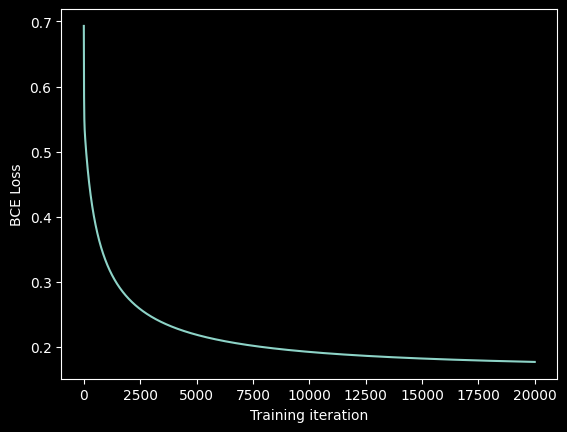

In [152]:
plt.plot(losses.loss_history)
plt.xlabel('Training iteration')
plt.ylabel('BCE Loss')

The below code should apply your trained model to the Test_Dataset, and return the predicted classes. If the training appeared to work (achieving a loss of about 0.16 by the final iteration), but the predictions are very wrong, make sure that you've applied the normalisation correctly to the Test_Dataset features before running prediction.

In [141]:
predictions = Model.predict(Test_Dataset[0])
true_labels = Test_Dataset[1]

In [142]:
Model.predictions


array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1]])

## 3.2 - Task 2 - Testing the Classifier

Compare the predictions to the true class labels from 'Test_Dataset'. 
The accuracy is given by the ratio of the number of correct predictions to the total number of samples input to the classifier.
Calculate the accuracy of the classifier.

In [154]:
true_labels = true_labels.reshape(20,1)

In [155]:
matches = (predictions == true_labels)

accuracy = np.sum(matches) / np.size(predictions, axis = 0)



In [159]:


true_positives = np.logical_and( predictions == 1, true_labels == 1)
false_positives = np.logical_and( predictions == 1, true_labels == 0)
false_negative = np.logical_and( predictions == 1, true_labels == 0)
true_negative = np.logical_and( predictions == 0, true_labels == 0)



For the below:\
a True Positive is a case where the model prediction $\hat{y}$ = 1 and the label $y$ = 1\
a False Positive is a case where the model prediction $\hat{y}$ = 1 and the label $y$ = 0\
a False Negative is a case where the model prediction $\hat{y}$ = 0 and the label $y$ = 1\
a True Negative is a case where the model prediction $\hat{y}$ = 0 and the label $y$ = 0

The True Postive Rate is given by the ratio of True Positives to the total number of actual positives (True Positives + False Negatives). Considering label y=1 to be a positive case, calculate the True Postive Rate rate of the classifier. 

The False Positive Rate is given by the ratio of False Positives to the total number of negatives (False Positives + True Negatives). Calculate the False Positive Rate for this classifier.

The True Negative Rate is given by the ratio of True Negatives to the total number of negatives (True Negatives + False Positives). Calculate the True Negative Rate for this classifier.